In [6]:
import matplotlib.pyplot as plt


from extract_WEST_data import arc_length_div, E_ion_div, E_atom_div, ion_flux_div, \
    atom_flux_div, net_heat_flux_div, ind_target_div

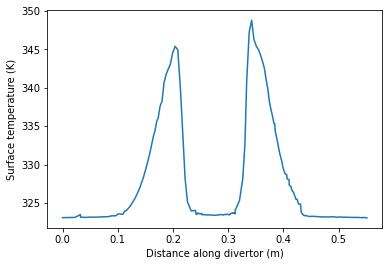

In [7]:
T = 1.1e-4*net_heat_flux_div + 323

plt.plot(arc_length_div, T)
plt.xlabel("Distance along divertor (m)")
plt.ylabel("Surface temperature (K)")
plt.show()

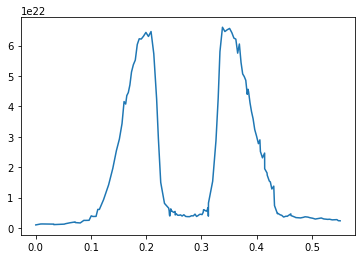

In [9]:
import numpy as np
def D(T):
    D_0_W = 1.9e-7
    E_D_W = 0.2
    return D_0_W*np.exp(-E_D_W/8.6e-5/T)
implantation_range_ions = 1.4e-10 * E_ion_div**0.64
implantation_range_atoms = 1.4e-10 * E_atom_div**0.64

c_max = ion_flux_div*implantation_range_ions/D(T) + atom_flux_div*implantation_range_atoms/D(T)
plt.plot(arc_length_div, c_max)
plt.show()

In [21]:
from inventory_T_c import estimate_inventory_with_gp_regression
from scipy.interpolate import interp2d

inv, sig, points_x, points_y, sim_points = \
    estimate_inventory_with_gp_regression()

inv_T_c = interp2d(points_x, points_y, inv, kind='cubic')

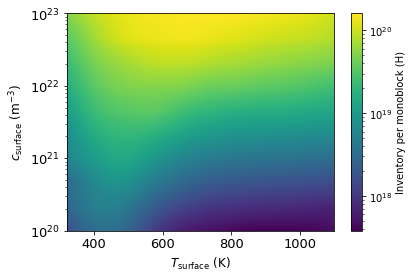

In [23]:
XX, YY = np.meshgrid(points_x, points_y)

values = np.zeros(XX.shape)
for i in range(len(XX)):
    for j in range(len(XX[i])):
        if XX[i][j] < 1200:
            val = inv_T_c(XX[i][j], YY[i][j])
            values[i][j] = val
locator = ticker.LogLocator(base=10)
levels = np.logspace(
    min(np.log10(inv)),
    max(np.log10(inv)),
    1000)
CS = plt.contourf(XX, YY, values, locator=locator, levels=levels)
plt.colorbar(CS, label=r"Inventory per monoblock (H)", ticks=locator)
plt.yscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xlabel(r"$T_\mathrm{surface}$ (K)", fontsize=12)
plt.ylabel(r"$c_\mathrm{surface}$ (m$^{-3}$)", fontsize=12)
plt.show()

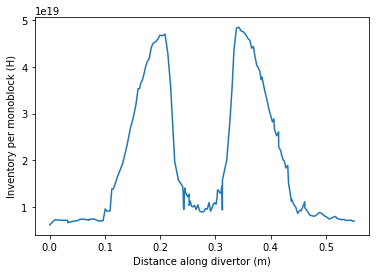

In [28]:
inventories = []
for temperature, concentration in zip(T, c_max):
    inventories.append(inv_T_c(temperature, concentration))
plt.plot(arc_length_div, inventories)
plt.xlabel("Distance along divertor (m)")
plt.ylabel("Inventory per monoblock (H)")
plt.show()